# Superstore (Parte I): respondendo perguntas de negócio com Python

A proposta deste documento é apresentar um exercício de:
- **Análise exploratória de dados (EDA)**: manipulação e análise de dados brutos, identificando padrões e realizando a sua limpeza;
- **Análise de grandes volumes de dados**: trabalho com bases de dados grandes e/ou não estruturados;
- **Visualização de dados**: criação de dashboards utilizando bibliotecas Python como Plotly, Matplotlib e Seaborn;
- **Prática de projetos relacionados a negócios**: geração de _insights_ com o intuito de otimizar processos e melhorar performances.

Com um _dataset_ público da Superstore, obtido por meio plataforma Kaggle, foram respondidas algumas perguntas de negócios. O intuito desta atividade é praticar não apenas habilidades técnicas e ferramentas, mas também a capacidade de resolver problemas reais e comunicar impressões de maneira clara.

## 0. Importando bibliotecas 📔

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import datetime
import time
from datetime import date
from datetime import datetime, date, time

%matplotlib inline

from functools import reduce

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Colocando estilo nos gráficos
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Importando os dados 🎲

Primeiramente, abriremos o nosso arquivo e daremos uma espiada nas primeiras linhas de nossa tabela:

In [3]:
data_source=pd.read_csv('superstore.csv', encoding='ISO-8859-1')

In [6]:
data_source.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Em seguida, criaremos uma cópia para edição. Com uma versão _raw_, estamos seguros para manipular os dados sem arrependimentos caso algo dê errado! Vamos chamar a tabela de _data_.


In [7]:
data=data_source.copy()

## 2. Explorando os dados (sanity check) 🔍

Uma boa prática da análise de dados é averiguar se não há informações estranhas como datas negativas, números em colunas que deveriam ser texto, dentre outras anomalias. 

Nas próximas células, faremos algumas investigações. A primeira delas é descobrir o tamanho de nossa tabela.

In [14]:
data.shape

(9994, 21)

Em seguida, vamos averiguar quais são as nossas colunas!

In [15]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Precisamos ainda saber em que formato estão os dados, visto que informações em formatos específicos podem exigir operações diferentes!
Pense, por exemplo, que é impossível realizar operações matemáticas em colunas onde os dados numéricos estão escritos por extenso (três, dois...).

In [16]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

✍️ Podemos notar que algumas colunas, como _Ship Date_, estão em formato de objeto. Isso signfica que precisaremos trabalhar com a formatação de datas. Felizmente, já importamos as bibliotecas necessárias para isso (_time, datetime_).

Prosseguindo com a exploração: colunas de IDs não podem estar vazias de forma alguma. Vamos realizar um teste utilizando a função `isnull`, que seleciona linhas nulas em quaiquer colunas que indicarmos. 

In [17]:
data[data['Order ID'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Também podemos fazer uma averiguação genérica. Visto que cada resultado Falso equivale a 0 e cada resultado Verdadeiro equivale a 1, faremos uma soma para saber quantas ocorrências nulas existem neste _dataset_.

In [18]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Sanity check de business**

Em um _sanity check_ de _business_, vamos procurar por informações que não fazem sentido do ponto de vista do negócio, como valores extremamente desviantes. A função `describe` pode nos oferecer algumas informações úteis, como a contagem linhas por coluna, valores médios, desvio padrão, valores máximo e mínimo, dentre outras.

In [19]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


O que encontramos nesse processo? 

Observe que, nos valores, mínimos, obtivemos um cliente com lucro negativo. Dentre outras "coisas estranhas", também foi computada uma venda de 44 centavos e clientes com descontos na faixa de 80%.
Outro dado digno de nota é o valor das vendas no percentil 75%, que aparentemente se encontra muito distante de valor máximo de compra. Analisaremos as situações caso a caso!

**Cliente com lucro negativo**

Precisamos detectar a linha onde se encontra o valor mínimo na coluna _Profit_. 

In [22]:
data[data['Profit']==data['Profit'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,11/25/2016,12/2/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


Observamos que uma cliente comprou cinco impressoras 3D e recebeu 70% de desconto. Por se tratar de um exercício hipotético, vamos supor que contatamos a equipe de vendas e o caso se tratava de uma situação de parceria realizada. Próximo!

**Venda de 44 centavos**

Vamos utilizar a mesma função para investigar a ocorrência.

In [23]:
data[data['Sales']==data['Sales'].min()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4101,4102,US-2017-102288,6/19/2017,6/23/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.11


Observamos que uma cliente comprou uma correia barata e recebeu 80% de desconto. Vamos supor que contatamos a equipe de vendas e foi uma situação de desconto por avaria na peça. Próximo!

**Percentil de 75% das vendas**

Os quantis são usados para entender a distribuição dos dados e identificar valores atípicos (chamados _outliers_), bem como características específicas da distribuição.
Vamos calcular percentis utilizando a função `quantile`, que nos retornará os quantis de dados desejados por coluna. Desejamos descobrir em qual "fatia" se encontram os _outliers_, por isso começaremos observando o nosso top 10% em vendas.

In [26]:
data['Sales'].quantile(0.9)

572.7060000000001

O resultado ainda está muito distante e muito mais baixo do que o valor máximo de compra. 
Vamos então tentar filtrar o top 3% das vendas (percentil de 97%), visualizando toda a linha. Como queremos ordenar esses valores, vamos adicionar a função `sort_values` para indicar por qual coluna será feita a ordenação. Para que a ordem seja decrescente, inclua `ascending=False`.

In [27]:
data[data['Sales']>=data['Sales'].quantile(0.97)].sort_values('Sales', ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,558,CA-2016-113243,6/10/2016,6/15/2016,Standard Class,OT-18730,Olvera Toch,Consumer,United States,Los Angeles,...,90045,West,FUR-TA-10004256,Furniture,Tables,Bretford Just In Time Height-Adjustable Mult...,1335.680,4,0.2,-217.0480
4458,4459,CA-2017-105851,3/13/2017,3/20/2017,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Denver,...,80219,West,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,1332.496,2,0.2,-299.8116
5559,5560,US-2015-114741,12/6/2015,12/10/2015,Standard Class,IL-15100,Ivan Liston,Consumer,United States,North Las Vegas,...,89031,West,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,1325.850,5,0.0,238.6530
4937,4938,CA-2014-157147,1/13/2014,1/18/2014,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,...,94109,West,OFF-ST-10000078,Office Supplies,Storage,Tennsco 6- and 18-Compartment Lockers,1325.850,5,0.0,238.6530


Agora podemos visualizar os cinco maiores valores de compras e nossos possíveis _outliers_.

Aproveitando a função de ordenamento usada na exploração anterior, podemos descobrir quem são as pessoas que recebem os descontos mais altos no percentil de 70%. Faremos isso trocando _Sales_ por _Discount_:

In [28]:
data[data['Discount']>0.7].sort_values('Discount', ascending=False).head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
14,15,US-2015-118983,11/22/2015,11/26/2015,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580
7505,7506,US-2017-106579,6/8/2017,6/13/2017,Standard Class,BW-11200,Ben Wallace,Consumer,United States,Skokie,...,60076,Central,OFF-BI-10000309,Office Supplies,Binders,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",12.176,4,0.8,-18.8728
7451,7452,CA-2017-105669,9/17/2017,9/22/2017,Second Class,SJ-20125,Sanjit Jacobs,Home Office,United States,Houston,...,77036,Central,OFF-BI-10002412,Office Supplies,Binders,Wilson Jones Snap Scratch Pad Binder Tool fo...,5.800,5,0.8,-10.1500
7348,7349,CA-2014-130421,3/3/2014,3/7/2014,Standard Class,SC-20020,Sam Craven,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,176.772,3,0.8,-459.6072
7301,7302,CA-2014-163468,11/18/2014,11/21/2014,First Class,JK-15730,Joe Kamberova,Consumer,United States,Des Plaines,...,60016,Central,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,2.892,3,0.8,-4.9164


Observando a tabela gerada, notamos que os maiores descontos são para produtos de escritório e que descontos acima de 80% costumam gerar prejuízo (ver a coluna _Profit_). **Uma possível sugestão para análises futuras seria verificar como se dá a relação entre lucro e descontos.** Também seria interessante considerar o desenvolvimento de estudos que avaliassem como a ausência de descontos afetaria as taxas de conversão. 

✍🏻 O trabalho do analista é identificar oportunidades!

## 3. Limpando os dados 🧹

Para o processo de limpeza, vamos eliminar colunas que não possuem função para nossa tarefa, como _Row ID_, usando o comando `drop`.


`axis=0` "dropa" o índice, `axis=1` "dropa" uma coluna específica.
Já `inplace=True` significa que agora _data_ tem nova configuração, ou seja, foi substituída. O uso de `inplace=False` criaria uma cópia.

In [29]:
data.drop('Row ID', axis=1, inplace=True)

Também precisamos de uma coluna de mês, visto que a análise de evolução temporal costuma ser realizada mês a mês. Por ora, temos uma coluna de datas organizada por dia.

Outro fato anteriormente observado é que as datas estão em forma de objeto, provavelmente uma _string_ (texto). Para extrair o mês desse texto, precisamos primeiro converter a _string_ em formato data (com função do pandas chamada `to_datetime`) e depois realizar a extração do mês (com função do datetime chamada `to_period`).
O mês é caracterizado pela letra m.

In [30]:
data['order_month']=pd.to_datetime(data ['Order Date']).dt.to_period('m')

## 4. Respondendo perguntas de negócio ✏️

**Finalmente** vamos responder as nossas perguntas de negócio!
A maior parte do esforço mental já foi realizada e temos uma documentação pré-organizada a nosso favor. É possível que ao decorrer do processo surjam novas perguntas, uma vez que visualizarmos melhor todas as variáveis que influenciam nossos problemas de negócio.

Vamos começar?

#### **Quais variáveis temos para explorar?**

Para responder a essa pergunta, iremos contar o número de colunas excluindo a _Order ID_. Podemos usar o `shape` (coordenada 1, que significa coluna - se quiséssemos a linha, seria coordenada 0) menos um.

Observação: a função `print` só concatena elementos iguais (apenas _strings_ ou apenas números inteiros, por exemplo). Nossa variável está em forma de número, por isso precisamos convertê-la para a forma de texto com o comando `str`.

In [32]:
variaveis=data.shape[1]-1
print ('Temos ' + str(variaveis)+ ' variáveis para análise')

Temos 20 variáveis para análise


#### **Quantos pedidos tivemos no total?**

Se olharmos atentamente para os dados, perceberemos que existem linhas com pedidos duplicados. A razão disto é que **cada linha da tabela corresponde a um produto diferente, não a um pedido**. Pensando nisso, precisamos contar quantos IDs de pedidos **distintos** tivemos. Vamos fazer esse cálculo utilizando o comando `unique()`. Para ler o número de linhas, voltamos à velha conhecida função `shape`:

In [33]:
pedidos_distinct=data['Order ID'].unique().shape[0]
print ('Temos ' + str(pedidos_distinct) + ' pedidos distintos')

Temos 5009 pedidos distintos


#### **Qual tipo de entrega sai mais?**

Temos uma coluna chamada _Ship Mode_. Para responder à pergunta, faremos um agrupamento em uma nova tabela que nos mostre uma coluna com o tipo de entrega e outra coluna com a quantidade de entregas por tipo.

Antes, porém, é preciso verificar se para cada pedido (_Order ID_) temos uma única modalidade de envio correspondente.
Em uma tabela com as colunas _Order ID_ e _Ship Mode_, **a quantidade de pedidos únicos deve equivaler à quantidade de linhas únicas**. Isso significa que para cada pedido único só há uma equivalência de _Ship Mode_ e não existem outras combinações.

In [34]:
pedidos_unicos= len(data['Order ID'].unique())
linhas_unicas= len(data[['Order ID', 'Ship Mode']].drop_duplicates ())
pedidos_unicos==linhas_unicas

True

Agora sim podemos realizar o nosso agrupamento por modo de envio utilizando a função `groupby` e contar os pedidos utilizando a função `count`. Para evitar contabilização de dados duplicados, o ideal é selecionar apenas as linhas em que _Order ID_ e _Ship Mode_ são únicos.

In [35]:
data[['Order ID', 'Ship Mode']].drop_duplicates().groupby('Ship Mode').count()

,Order ID
Ship Mode,
First Class,787
Same Day,264
Second Class,964
Standard Class,2994


O tipo de entrega que mais sai é _Standard Class_.

#### **Qual é a situação atual da empresa (venda e lucro)?**

**Situação das vendas:**

Vamos selecionar quais colunas queremos visualizar: primeiramente, a receita mês a mês. Usamos a função `groupby` para realizar o agrupamento. Queremos a soma do valor das vendas, então também adicionamos `sum` ao comando.

In [36]:
data.groupby("order_month")['Sales'].sum()

order_month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160

Agora, faremos o mesmo tipo de agrupamento por mês, mas considerando o número de unidades vendidas. Basta trocar a coluna da soma!

In [37]:
data.groupby('order_month')['Quantity'].sum()

order_month
2014-01     284
2014-02     159
2014-03     585
2014-04     536
2014-05     466
2014-06     521
2014-07     550
2014-08     609
2014-09    1000
2014-10     573
2014-11    1219
2014-12    1079
2015-01     236
2015-02     239
2015-03     515
2015-04     543
2015-05     575
2015-06     486
2015-07     557
2015-08     598
2015-09    1086
2015-10     631
2015-11    1310
2015-12    1203
2016-01     358
2016-02     306
2016-03     579
2016-04     635
2016-05     863
2016-06     742
2016-07     758
2016-08     693
2016-09    1316
2016-10     767
2016-11    1406
2016-12    1414
2017-01     597
2017-02     363
2017-03     885
2017-04     733
2017-05     887
2017-06     931
2017-07     840
2017-08     884
2017-09    1660
2017-10    1133
2017-11    1840
2017-12    1723
Freq: M, Name: Quantity, dtype: int64

✍🏻 Procurando por padrões: note que os meses de novembro e dezembro costumam apresentar um aumento no número de vendas.
Isso significa que devemos considerar o fator da sazonalidade! Pode ser um evento relacionado ao mercado (_Black Friday_ ou Natal).

Vamos visualizar as nossas descobertas em gráficos utilizando a função `plot`.

**Evolução da receita (mensal):**

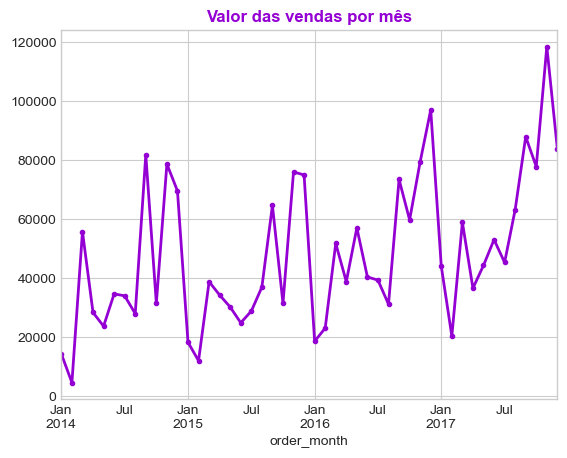

In [60]:
data.groupby('order_month')['Sales'].sum().plot(color='darkviolet', marker='.', lw=2)
plt.title('Valor das vendas por mês', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'darkviolet'})
plt.show()

**Evolução da quantidade de mercadorias vendidas (mensal):**


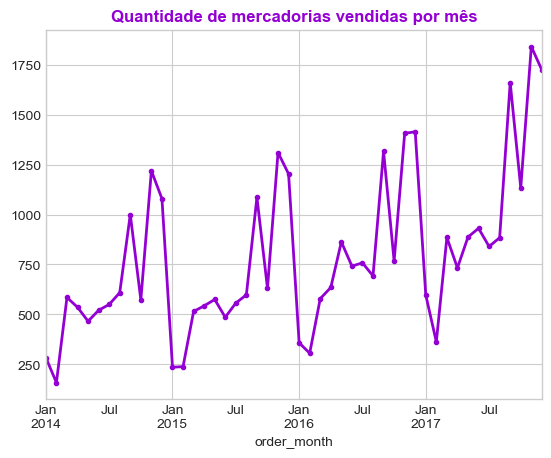

In [61]:
data.groupby('order_month')['Quantity'].sum().plot(color='darkviolet', marker='.', lw=2)
plt.title('Quantidade de mercadorias vendidas por mês', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'darkviolet'})
plt.show()

Conforme já havíamos percebido, há um componente sazonal nos meses de setembro, novembro e dezembro.
Em empresas que operam há muitos anos e há registro de grandes oscilações, pode ser mais eficiente conduzir uma análise de **escala anual**.

Para realizar a análise ano a ano, necessitamos de uma nova coluna:

In [46]:
data['order_year']=pd.to_datetime(data['Order Date']).dt.to_period('y')

**Evolução da receita (anual):**

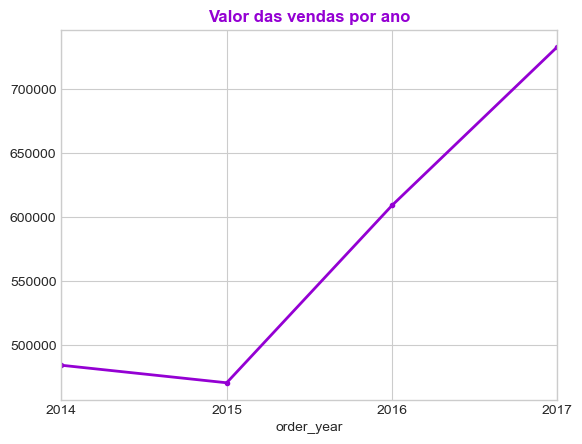

In [62]:
data.groupby('order_year')['Sales'].sum().plot(color='darkviolet', marker='.', lw=2)
plt.title('Valor das vendas por ano', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'darkviolet'})
plt.show()

**Evolução da quantidade de mercadorias vendidas (anual):**


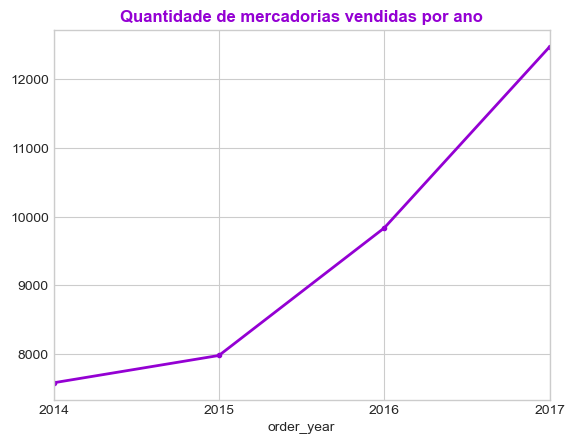

In [63]:
data.groupby('order_year')['Quantity'].sum().plot(color='darkviolet', marker='.', lw=2)
plt.title('Quantidade de mercadorias vendidas por ano', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'darkviolet'})
plt.show()

**Situação do lucro**:

Para a análise, repetiremos o mesmo processo de agrupamento mensal da soma do lucro (coluna _Profit_). Podemos visualizar os dados em forma de gráfico para entender se há muita oscilação ou efeitos de sazonalidade.

**Evolução do lucro (mensal):**

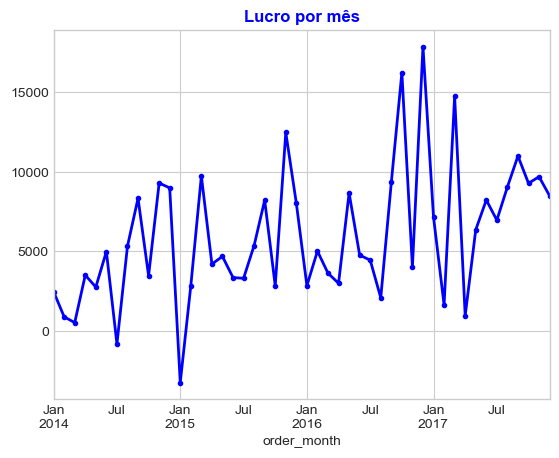

In [64]:
data.groupby('order_month')['Profit'].sum().plot(color='blue', marker='.', lw=2)
plt.title('Lucro por mês', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'blue'})
plt.show()

**Evolução do lucro (anual):**

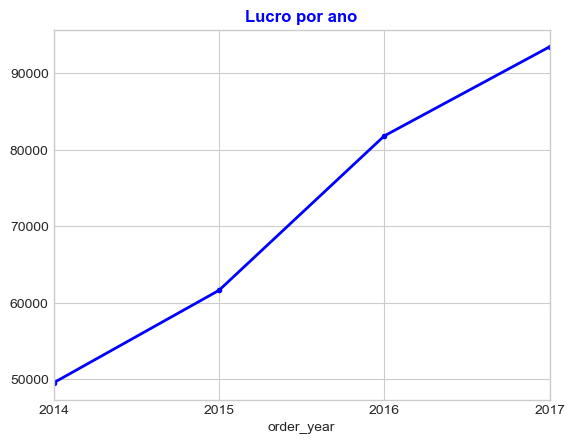

In [65]:
data.groupby('order_year')['Profit'].sum().plot(color='blue', marker='.', lw=2)
plt.title('Lucro por ano', {'fontsize': 12,
 'fontweight': 'bold',
 'color': 'blue'})
plt.show()

Conseguimos responder a nossa pergunta: com a observação dos dados em forma de gráfico, notamos que há **aumento progressivo de vendas e lucro** com o passar do tempo.

#### **Quais são os segmentos mais lucrativos?**

Note como `groupby` é uma das funções mais utilizadas em Python! Mais uma vez, vamos agrupar as informações: dessa vez, a soma do lucro por segmento.

In [59]:
data.groupby('Segment')['Profit'].sum()

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

**Lucro por segmento:**

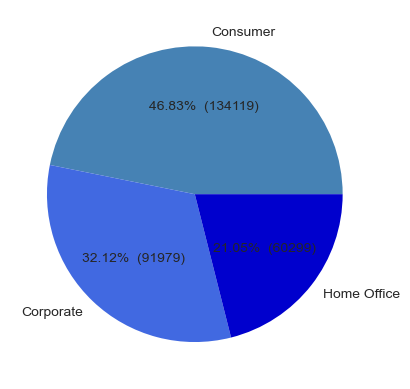

In [66]:
colors=['steelblue', 'royalblue', 'mediumblue']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(data.groupby('Segment')['Profit'].sum(), colors=colors, labels=data.groupby('Segment')['Profit'].sum().index,
autopct=make_autopct(data.groupby('Segment')['Profit'].sum()))
plt.show()

Rapidamente descobrimos que o segmento de produtos mais lucrativo é o segmento _Consumer_.

O segmento _Consumer_ ocupa esta posição por ser campeão em quantidade de pedidos, por seus pedidos serem mais lucrativos ou por ambas as possibilidades? Prosseguindo em nossa investigação, vamos analisar o **lucro médio** dos pedidos em cada segmento **dividindo a soma do lucro pela soma da quantidade de pedidos**.

In [67]:
data.groupby('Segment')['Profit'].sum()/data.groupby('Segment')['Quantity'].sum()

Segment
Consumer       6.870509
Corporate      7.923771
Home Office    8.941085
dtype: float64

Observamos que o segmento _Consumer_ é o mais lucrativo devido à quantidade de produtos vendidos ser maior. Quando consideramos lucro por mercadoria vendida, a área _Home Office_ ganha.**Seria interessante investir no Marketing do segmento _Home Office_ para otimizar o lucro da empresa.**

#### **Quais regiões geram maior receita e lucro?**

Vamos fazer o agrupamento por região com a soma de três variáveis distintas, sendo elas Receita, Lucro e Quantidade de vendas. Quando temos uma série de dados (no caso, três colunas) na função, usamos dois colchetes.

In [63]:
data.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum()

,Sales,Profit,Quantity
Region,,,
Central,501239.8908,39706.3625,8780
East,678781.2400,91522.7800,10618
South,391721.9050,46749.4303,6209
West,725457.8245,108418.4489,12266


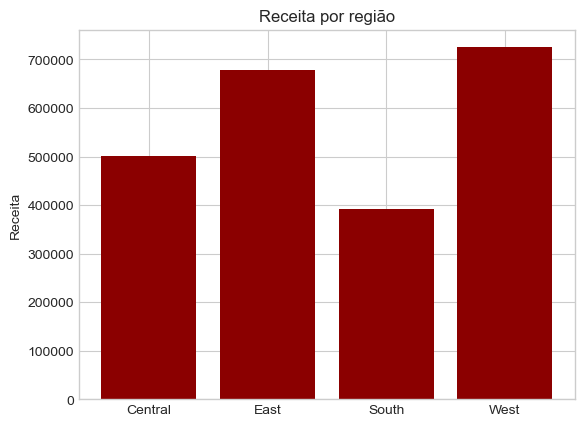

In [9]:
categorias=data.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum()
plt.bar(categorias['Sales'].index, categorias['Sales'].values, color='darkred')
plt.ylabel('Receita')
plt.title('Receita por região')
plt.show()

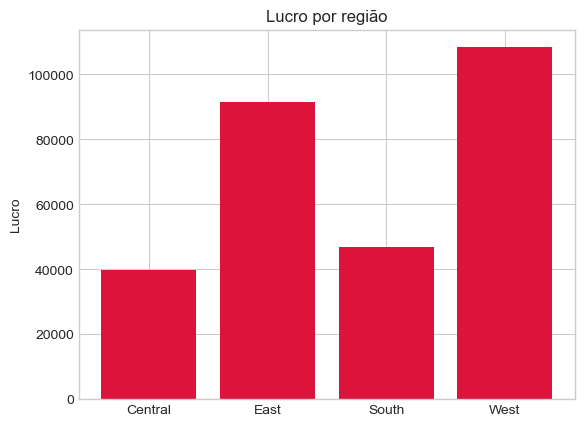

In [70]:
categorias=data.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum()
plt.bar(categorias['Profit'].index, categorias['Profit'].values, color='crimson')
plt.ylabel('Lucro')
plt.title('Lucro por região')
plt.show()

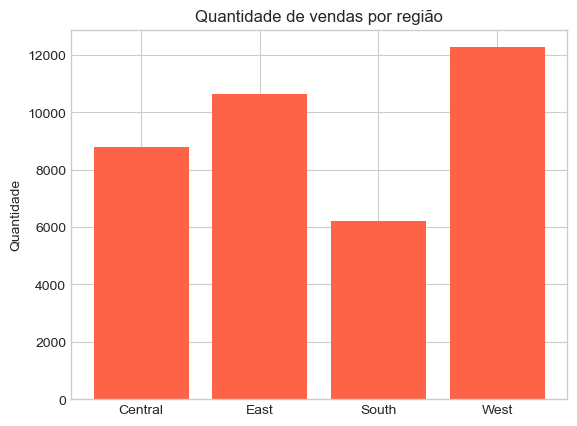

In [78]:
categorias=data.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum()
plt.bar(categorias['Quantity'].index, categorias['Quantity'].values, color='tomato')
plt.ylabel('Quantidade')
plt.title('Quantidade de vendas por região')
plt.show()

Percebemos que as regiões Oeste e Leste são numericamente campeãs em receita, lucro e vendas.A partir destes dados, podemos pensar em **novas questões**: o destaque das regiões Oeste e Leste sempre se manteve ou é recente?É possível que as estratégias de marketing estejam sendo direcionadas a regiões que não se interessam mais por nossos produtos?

Vamos acompanhar a evolução da receita, do lucro e da quantidade de vendas ao longo do tempo:

In [72]:
data.groupby(['order_year', 'Region'])[['Sales', 'Profit', 'Quantity']].sum()

Sales      Profit  Quantity
order_year Region                                    
2014       Central  103838.1646    539.5534      1726
           East     128680.4570  17059.6095      1986
           South    103845.8435  11879.1200      1336
           West     147883.0330  20065.6912      2533
2015       Central  102874.2220  11716.8020      1815
           East     156332.0570  21091.0130      2382
           South     71359.9805   8318.5940      1344
           West     139966.2495  20492.1947      2438
2016       Central  147429.3760  19899.1629      2359
           East     180685.8220  20141.5961      2839
           South     93610.2235  17702.8084      1614
           West     187480.1765  24051.6069      3025
2017       Central  147098.1282   7550.8442      2880
           East     213082.9040  33230.5614      3411
           South    122905.8575   8848.9079      1915
           West     250128.3655  43808.9561      4270

Em quantidades, a tendência de prevalência das regiões Oeste e Leste se manteve ao longo dos anos. Já em números de vendas, observamos uma certa nebulosidade.

Vamos olhar especificamente para a **receita** ao longo dos anos e por região. Para melhor visualização, é possível usar a função `unstack`.

Text(0.5, 1.0, 'Evolução da receita ao longo do tempo')

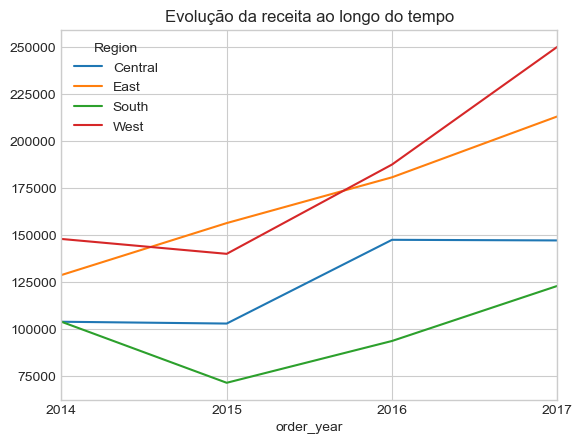

In [76]:
data.groupby(['order_year', 'Region'])['Sales'].sum().unstack().plot()
plt.title('Evolução da receita ao longo do tempo')


Sempre houve uma competição acirrada entre vendas no Oeste e no Leste, mas nos últimos anos Oeste se encontra mais destacado.

Em seguida, vamos olhar especificamente para o **lucro** ao longo dos anos e por região.

Text(0.5, 1.0, 'Evolução do lucro ao longo do tempo')

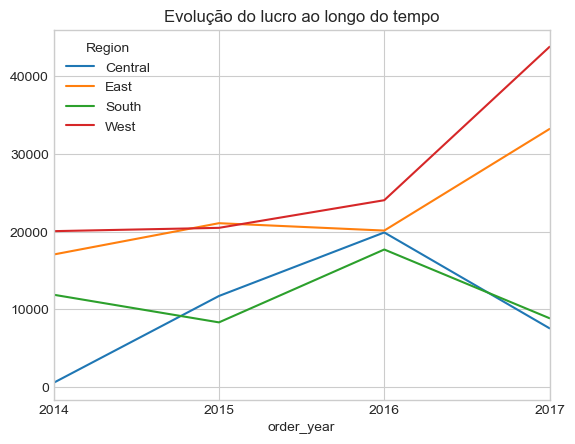

In [77]:
data.groupby(['order_year', 'Region'])['Profit'].sum().unstack().plot()
plt.title('Evolução do lucro ao longo do tempo')


As mesmas tendências são observadas.


Respondendo à nossa pergunta de negócio, **as regiões mais lucrativas são Oeste e Leste**. Podemos considerar investir em mais propagandas direcionadas a estes locais.

#### **Quais são as categorias de produtos mais pedidas?**

Vamos supor que desejamos analisar estas categorias com a finalidade de desenvolver estratégias de marketing bem orientadas. Uma boa ideia seria realizar a filtragem dos dados para os anos mais recentes do nosso _dataset_.


Observação: se escrevermos apenas `data[data['order_year']>=2016]`, o resultado apresentará erro. Nossa coluna _order_year_ está em formato período e 2016 é formato número inteiro. É preciso converter a informação usando a função `astype` e criar uma coluna de _order_year_ numérico.

In [79]:
data['order_year_numerico']=data['order_year'].astype('int64')
data_recente=data[data['order_year_numerico']>=46]

Por alguma razão desconhecida, a coluna _order_year_numerico_ transformou o número 2015 em 45, o número 2016 em 46 e assim por diante. Por conta disso, foi necessário realizar uma "gambiarra" no código para filtrarmos os dados dos anos mais recentes (2016 e 2017).

Agora que possuímos uma tabela (_data_recente_) apenas com dados de 2016 em diante, podemos agrupar as categorias por lucro total. Para que os resultados apareçam em ordem decrescente, usamos a função `sort_values(ascending=False)`.

In [80]:
data_recente.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         90458.2486
Office Supplies    74797.8509
Furniture           9978.3444
Name: Profit, dtype: float64

**Tecnologia é a categoria mais lucrativa**. Podemos descobrir também qual é a categoria com mais lucro por unidade vendida (com o intuito de entender se essa organização se dá por número ou por valor das vendas).

In [81]:
total_lucro=data_recente.groupby('Category')['Profit'].sum()
total_unidade=data_recente.groupby('Category')['Quantity'].sum()
(total_lucro/total_unidade).sort_values(ascending=False)

Category
Technology         22.27487
Office Supplies     5.49096
Furniture           2.15515
dtype: float64

**Confirmamos que a área de tecnologia é altamente lucrativa**. Bom setor para investir em estratégias e aumentar a quantidade de vendas.

Por curiosidade, podemos averiguar como é a distribuição de lucro destas categorias nas regiões mais destacadas, Oeste e Leste. Vamos começar criando um filtro para as regiões.

In [105]:
data_recente_west_east=data_recente[(data_recente['Region']=='West') | (data_recente['Region']=='East')]

Em seguida, realizaremos um agrupamento por região e categoria. 

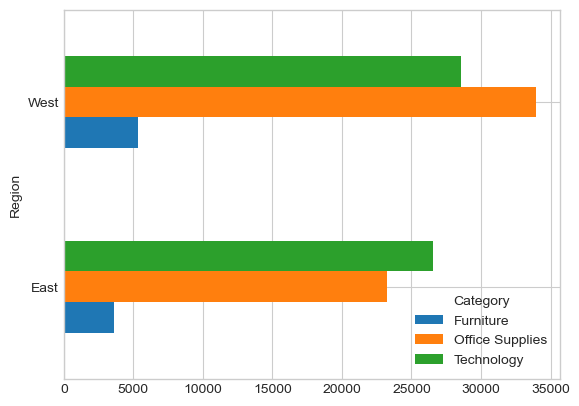

In [106]:
data_recente_west_east.groupby(['Region', 'Category'])['Profit'].sum().unstack().plot.barh()
plt.show()

Observar estes dados pode ser interessante para gerar conhecimentos ainda mais específicos a cada tipo de região.

#### **Quais subcategorias de produtos tecnológicos são as mais relevantes?**

Vamos filtrar a tabela _data_recente_ para visualizarmos apenas as informações de tecnologia e agrupar os dados por subcategoria.

In [82]:
data_recente[data_recente['Category']=='Technology'].groupby('Sub-Category')[['Sales', 'Quantity', 'Profit']].sum()

,Sales,Quantity,Profit
Sub-Category,,,
Accessories,101842.086,1761,25336.6455
Copiers,112498.798,142,42774.5828
Machines,99451.561,250,38.1024
Phones,184302.546,1908,22308.9179


As subcategorias mais relevantes são os produtos de **telefones e copiadoras**.
Novamente, devemos descobrir qual é a subcategoria com mais lucro por unidade vendida (com o intuito de entender se essa organização se dá por número ou por valor das vendas).

Nomeamos a tabela...

In [88]:
data_tech=data_recente[data_recente['Category']=='Technology'].groupby('Sub-Category')[['Sales', 'Quantity', 'Profit']].sum()

E criamos uma nova coluna de lucro por unidade de venda (_Profit_/_Quantity_).

In [89]:
data_tech['profit_per_quantity']=data_tech['Profit']/data_tech['Quantity']

data_tech

,Sales,Quantity,Profit,profit_per_quantity
Sub-Category,,,,
Accessories,101842.086,1761,25336.6455,14.387647
Copiers,112498.798,142,42774.5828,301.229456
Machines,99451.561,250,38.1024,0.152410
Phones,184302.546,1908,22308.9179,11.692305


Notamos que a subcategoria que pode gerar mais lucro por unidade vendida são as **copiadoras**.

✍ O quanto conseguiríamos de fato ampliar a venda das copiadoras? Suponha que seja possível vender no máximo 500 copiadoras por mês, mas que para os telefones seja possível ampliar os números de vendas em até 20 vezes. A melhor subcategoria deve levar em consideração a possibilidade de escala -  e aqui reside a importância das análises de cenário com _business development_.

#### **Qual estado possui mais vendas?**

Vamos agrupar os dados da tabela _data_recente_ por estado, analisando valores de lucro e vendas.

**Top 10 estados em lucro:**

In [94]:
data_recente.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)

State
California    49372.1750
New York      41012.0212
Washington    21466.6555
Michigan      17480.2806
Indiana       15524.6596
Georgia        9994.4165
Virginia       9657.4876
New Jersey     7213.0952
Delaware       7029.9107
Kentucky       5968.3840
Name: Profit, dtype: float64

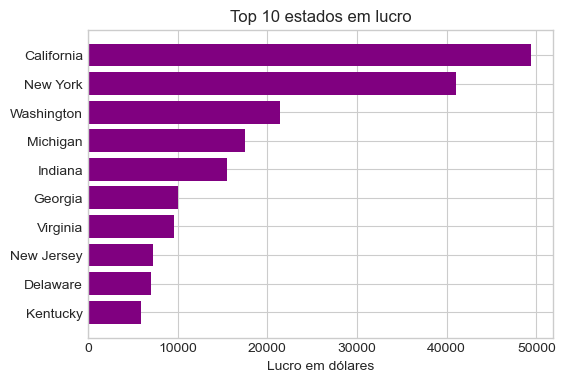

In [104]:
top_ten_profit=data_recente.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)

plt.figure(figsize=(6,4))
plt.barh(top_ten_profit.index, top_ten_profit.values, color='purple')
plt.title('Top 10 estados em lucro')
plt.xlabel('Lucro em dólares')
plt.show()

**Piores estados em lucro:**

In [95]:
data_recente.groupby('State')['Profit'].sum().sort_values(ascending=False).tail(10)

State
Florida            -227.7465
Oregon             -942.9719
Arizona           -2761.1100
Tennessee         -3467.5906
North Carolina    -4827.6923
Colorado          -5824.9809
Pennsylvania      -9297.7975
Ohio              -9339.4223
Illinois          -9554.6539
Texas            -14078.1598
Name: Profit, dtype: float64

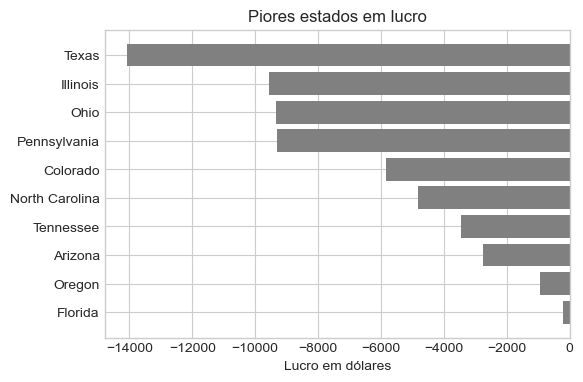

In [97]:
pior_lucro=data_recente.groupby('State')['Profit'].sum().sort_values(ascending=False).tail(10)

plt.figure(figsize=(6, 4))
plt.barh(pior_lucro.index, pior_lucro.values, color='grey')
plt.title('Piores estados em lucro')
plt.xlabel('Lucro em dólares')
plt.show()

**Top 10 estados em valor de vendas:**

In [98]:
data_recente.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

State
California      277940.2560
New York        165767.0970
Washington       85354.1800
Texas            85107.9102
Pennsylvania     75754.9500
Michigan         53253.6840
Ohio             48012.8600
Illinois         45385.3300
Indiana          43978.2300
Florida          40047.9990
Name: Sales, dtype: float64

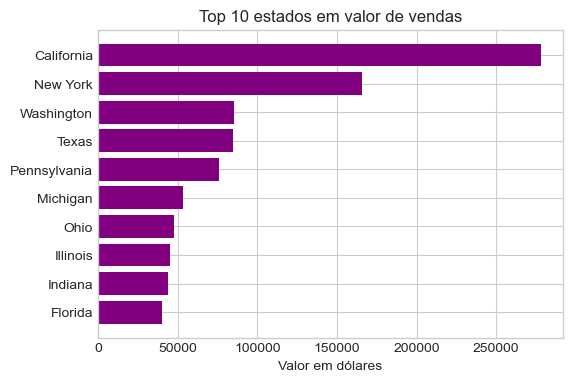

In [103]:
top_ten_profit=data_recente.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)

plt.figure(figsize=(6,4))
plt.barh(top_ten_profit.index, top_ten_profit.values, color='purple')
plt.title('Top 10 estados em valor de vendas')
plt.xlabel('Valor em dólares')
plt.show()

Uma observação importante: ainda que o Texas seja um dos locais com bom indicador referente ao valor total de vendas, ele configura como **o estado menos lucrativo**.
Outros estados que também estão no "Top 10 em valor de vendas", porém dentre os menos lucrativos, são Illinois e Pennsylvania.

Podemos usar a função `mean` para observar qual a média de descontos nesses estados e se isso apresentaria alguma relação com o lucro negativo.

**Média de descontos por estado**:

In [102]:
data_recente.groupby('State')['Discount'].mean().sort_values(ascending=False).head(10)

State
Illinois          0.387372
Texas             0.364673
Pennsylvania      0.334328
Colorado          0.326549
Arizona           0.324779
Oregon            0.321538
Ohio              0.318089
Florida           0.297406
Tennessee         0.291667
North Carolina    0.283648
Name: Discount, dtype: float64

Como próximos passos, poderíamos recomendar um teste diminuindo os descontos nos estados anteriormente citados e observar quais os efeitos dessa ação no lucro. Além disso, seria possível confirmar ou rejeitar a hipótese de que as vendas nestas localidades estão ocorrendo unicamente por conta dos baixos preços.

Já os estados de Washington, California e NY são **top vendas** e **top lucro**. O investimento em campanhas de marketing nesses estados pode nos proporcionar clientes lucrativos.

#### Considerações 

Através da exploração de dados e da aplicação de métodos analíticos, é possível identificar informações-chave que contribuem diretamente para a geração de _insights_ valiosos, fundamentais para a otimização de processos e a melhoria contínua dos negócios. Ao analisar dados históricos, comportamentais e operacionais, empresas podem obter uma visão mais profunda sobre seus desafios e oportunidades, permitindo decisões mais informadas e estratégicas!